I dag kommer vi gå igenom kapitel tre, dock står det mer i boken än vad vi tar upp. 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_path = "../data/Advertising.csv"

adv = pd.read_csv(data_path, index_col=0)
adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [14]:
# Y is a response variable
Y = sales = adv["sales"]
# Antag att regression av "TV" på "sales" är ungefär linjär
# Y = beta0 + beta1 X
# sales = beta0 + beta1 * "TV"
# Modellspecifikationsmatrisen (designmatrisen) behöver en 1:a i första kolumnen
X = TV = np.column_stack([np.ones(Y.shape[0]), adv["TV"]])
X

array([[  1. , 230.1],
       [  1. ,  44.5],
       [  1. ,  17.2],
       [  1. , 151.5],
       [  1. , 180.8],
       [  1. ,   8.7],
       [  1. ,  57.5],
       [  1. , 120.2],
       [  1. ,   8.6],
       [  1. , 199.8],
       [  1. ,  66.1],
       [  1. , 214.7],
       [  1. ,  23.8],
       [  1. ,  97.5],
       [  1. , 204.1],
       [  1. , 195.4],
       [  1. ,  67.8],
       [  1. , 281.4],
       [  1. ,  69.2],
       [  1. , 147.3],
       [  1. , 218.4],
       [  1. , 237.4],
       [  1. ,  13.2],
       [  1. , 228.3],
       [  1. ,  62.3],
       [  1. , 262.9],
       [  1. , 142.9],
       [  1. , 240.1],
       [  1. , 248.8],
       [  1. ,  70.6],
       [  1. , 292.9],
       [  1. , 112.9],
       [  1. ,  97.2],
       [  1. , 265.6],
       [  1. ,  95.7],
       [  1. , 290.7],
       [  1. , 266.9],
       [  1. ,  74.7],
       [  1. ,  43.1],
       [  1. , 228. ],
       [  1. , 202.5],
       [  1. , 177. ],
       [  1. , 293.6],
       [  1

In [16]:
# pseudoinvers för prestanda
b = np.linalg.pinv(X.T @ X) @ X.T @ Y
b

array([7.03259355, 0.04753664])

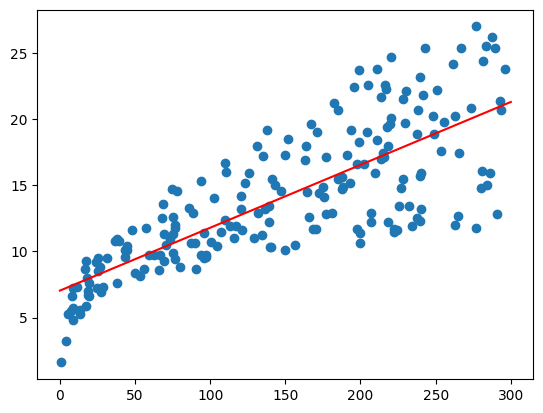

In [18]:
plt.scatter(X[:, 1], Y)
x = np.linspace(0,300)
y_hat = b[0] + b[1] * x
plt.plot(x, y_hat, color="red")
plt.show()

In [21]:
# RSS Residual Sum of Squares
# SSE Sum of Square Errors
# Samma sak! 
# stickprovets storlek
n = Y.shape[0]
# antalet parametrar, bara TV i detta fall, så 1
v = X.shape[1] - 1

SSE = np.sum(np.square(Y - (X @ b)))

print(np.column_stack([Y, X]))

[[ 22.1   1.  230.1]
 [ 10.4   1.   44.5]
 [  9.3   1.   17.2]
 [ 18.5   1.  151.5]
 [ 12.9   1.  180.8]
 [  7.2   1.    8.7]
 [ 11.8   1.   57.5]
 [ 13.2   1.  120.2]
 [  4.8   1.    8.6]
 [ 10.6   1.  199.8]
 [  8.6   1.   66.1]
 [ 17.4   1.  214.7]
 [  9.2   1.   23.8]
 [  9.7   1.   97.5]
 [ 19.    1.  204.1]
 [ 22.4   1.  195.4]
 [ 12.5   1.   67.8]
 [ 24.4   1.  281.4]
 [ 11.3   1.   69.2]
 [ 14.6   1.  147.3]
 [ 18.    1.  218.4]
 [ 12.5   1.  237.4]
 [  5.6   1.   13.2]
 [ 15.5   1.  228.3]
 [  9.7   1.   62.3]
 [ 12.    1.  262.9]
 [ 15.    1.  142.9]
 [ 15.9   1.  240.1]
 [ 18.9   1.  248.8]
 [ 10.5   1.   70.6]
 [ 21.4   1.  292.9]
 [ 11.9   1.  112.9]
 [  9.6   1.   97.2]
 [ 17.4   1.  265.6]
 [  9.5   1.   95.7]
 [ 12.8   1.  290.7]
 [ 25.4   1.  266.9]
 [ 14.7   1.   74.7]
 [ 10.1   1.   43.1]
 [ 21.5   1.  228. ]
 [ 16.6   1.  202.5]
 [ 17.1   1.  177. ]
 [ 20.7   1.  293.6]
 [ 12.9   1.  206.9]
 [  8.5   1.   25.1]
 [ 14.9   1.  175.1]
 [ 10.6   1.   89.7]
 [ 23.2   1. 

In [22]:
X.shape,Y.shape

((200, 2), (200,))

#### första rasten

Om två variabler är oberoende så är kovariansen noll, dvs Cov(X,Y) = 0. Vi kan inte antaga det omvända. Cov=0 betyder inte nödvändigtvis att X och Y är oberoende, men de är åtminstone inte linjärt beroende. Kovarians är alltså den svagaste indikationen, därefter kommer en starkare egenskap - korrelation- (Pearson coefficient of correlation). De ligger alltid mellan -1 och 1.  

Låt $X$ och $Y$ vara slumpvariabler med medel $\mu_x$ respektive $\mu_Y$ samt varianser $\sigma_X^2$ och $\sigma_Y^2$.  Korrelationen mellan $X$ och $Y$ ges då av:  

[kolla repot för alla specialare här]  

Om koefficienten är -1 eller 1 ($|rho| = 1$) då har vi visat att det finns en ekvation: Y = beta0 + beta1*X  

FÖr att räkna ut vår varians så tar vi:

In [ ]:
var = SSE/(n-v-1)   # sigma kvarderat
S = np.sqrt(var)    # sigma eller residual standard error
                    # alltså en uppskattning av standardfelet/stickprovsavvikelsen
SSR = np.sum(b*X.T @ Y) - (np.square(np.sum(Y)) / n) # sum of squares regression
Syy = np.sum(np.square(Y)) - (np.square(np.sum(Y)) / n) # sum of squares total
Sxx = np.sum(np.square(X)) - (np.square(np.sum(X)) / n) # sum of squares X
# Standardfelet, standard error (of the mean)
SE = var / n

Alla värden innanför värdet på S är innanför en standardavvikelse. Om du har sigma ett betyder ingenting alls, du måste ha ett intervall också. Vi använder standardfelet för att beräkna konferensintervall.  

SSE är alltså en uppskattning medan SSR är det faktiska. Vi ska använda alla dessa värden för att se hur bra korrelationen matchar, hur mycket förklarar den av datan osv.  

Nu vill vi veta hur bra vår uppskattning var av b0 och b1 och då använder vi standardfelet. 

In [ ]:
# square of standard error of β1 = var/Sxx
se_b = var/Sxx

ci = (b[1], 2*np.sqrt(se_b))
print(f"Confidence interval on predictor β1: {ci[0]:.4f} ± {ci[1]:.4f}")

Detta är väldigt ungefärligt ett 90 %-intervall (<2σ). Om vi kör regressionen många gånger på delmängder av datan (som skall ha samma medel, dvs vara balanserade) så väntar vi oss att 90 % av värdena hamnar mellan 0.053 och 0.042.  

In [ ]:
se_b0 = var * (1/n + np.mean(X)**2/Sxx)

In [ ]:
x_mean = np.mean(X[])
se_intercept = var * (1/n + np.mean(X)

se_intercept_copilot = var * (1/n + np.mean(X)**2/Sxx)      # b0

Om vi spenderar $1000 på TV-reklam kommer vi sälja ca 50 enheter till. Vi kan också använda standardfelen för att göra en grov uppskattning huruvida denna regressionen är statistiskt relevant eller inte. Då använder vi hypotestestning. Formulera en hypotes, nollhypotes: t ex att det inte finns en relation mellan X och Y. Ha är vår alternativa hypotes som sägre att det finns en relation mellan X och Y.  

[se R's anteckningar för latech]

In [ ]:
t = b[1] / se_b

Nu har vi fått ett "P-värde". Nu har vi sett att den är signifikant/relevant, den förklarar åtminstone en del av datan. Hur mycket? Hur bra är den?  

$\hat{\rho} = r = \frac{S_{xy}}{\sqrt{S_{xx}}{S_{yy}}}$

Hur många procent av datan täcks av vår regression. Får vi en etta så ligger alla punkterna på linjen. 